#Principal component analysis (PCA) exercise#

##Assignment 1: Implement PCA from scratch##

Please implement PCA algorithm with the following guidelines:
- U_k, X_avg, Z = PCA (X, K), where X is the input data matrix (each column is a sample), K is the number of remained components after removing less important components. For the output, Uk is the matrix made by K basis vectors (u_1, u_2, ..., u_k), Z is the output data after removing redundant components. X_avg is the new origin.
- X_reconstruct = decode (U_k, X_avg, X): restore the data (approximately) from U_k, X_avg, Z matrices.

In [1]:
import numpy as np

In [2]:
def PCA(X, K):                                                                  #K is the number of new components                                                                            

  # Centering the data by subtracting the mean
  X_mean = np.mean(X, axis = 0)
  X_avg = X - X_mean
  
  # Calculate the covariance matrix                                       
  covariance_matrix = np.cov(X_avg, rowvar=False)                               #Calculate the covariance matrix

  #TODO: Calculate eigenvalues and eigenvectors
  eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

  #TODO: Sort the eigenvalues in descending order
  index = np.argsort(eigen_values)[::-1]
  sorted_eigen_vectors = eigen_vectors[:, index]
  sorted_eigen_values = eigen_values[index]

  #TODO: Select the new basis and transform the data  
  U_k = sorted_eigen_vectors[:, 0:K]
  Z   = np.dot(U_k.transpose(), X_avg.transpose()).transpose()

  return U_k, X_mean, Z

In [26]:
def decode_PCA(U_k, X_mean, Z):

  #TODO: decode/restore the data before PCA step
  X_reconstruct = np.dot(U_k, Z.transpose()).transpose() + X_mean
  
  return X_reconstruct

Create dummy dataset and test the code yourself

Note: X and X_reconstruct MUST have the same shape (Please print out)

In [4]:
# TODO: Create dummy dataset and perform testing
X = np.random.randint(10,100,100).reshape(-1,5)
num_component = 2
X

array([[98, 53, 45, 43, 39],
       [22, 13, 20, 23, 78],
       [84, 51, 17, 85, 82],
       [80, 98, 93, 86, 85],
       [99, 67, 85, 30, 34],
       [44, 41, 92, 93, 45],
       [63, 59, 84, 80, 49],
       [93, 33, 25, 32, 57],
       [20, 70, 81, 95, 76],
       [62, 37, 58, 12, 26],
       [19, 20, 81, 98, 24],
       [17, 18, 66, 23, 54],
       [82, 47, 90, 84, 23],
       [18, 64, 48, 34, 39],
       [97, 47, 19, 87, 14],
       [30, 53, 17, 85, 19],
       [39, 44, 89, 90, 44],
       [77, 82, 89, 87, 59],
       [48, 24, 30, 25, 73],
       [52, 63, 26, 87, 37]])

In [5]:
U_k, X_mean, Z = PCA(X, num_component)

In [6]:
U_k

array([[-0.15433433,  0.92591322],
       [-0.39828949,  0.24200843],
       [-0.59536175, -0.25059709],
       [-0.67991009, -0.13485521],
       [ 0.02851425, -0.05596242]])

In [7]:
X_mean

array([57.2 , 49.2 , 57.75, 63.95, 47.85])

In [8]:
Z

array([[ 13.77228675,  45.21248852],
       [ 71.0275765 , -28.05775679],
       [  6.06956435,  30.71210213],
       [-57.87456448,  19.03472413],
       [ -7.07631046,  41.53556596],
       [-34.92060646, -26.54752497],
       [-31.30638746,  -1.0649772 ],
       [ 42.40925055,  41.23077924],
       [-36.693877  , -40.99917531],
       [ 38.66777917,   9.65773835],
       [-20.14753935, -51.52002976],
       [ 41.73681837, -41.66164879],
       [-36.49244714,  13.03529247],
       [ 26.07095428, -25.73657095],
       [  1.16686346,  44.8154805 ],
       [ 11.81064153, -15.27756234],
       [-31.54650203, -29.23874646],
       [-50.0787632 ,  14.70740572],
       [ 55.17769065,  -3.81778945],
       [ -1.77242805,   3.98020502]])

In [9]:
X_reconstruct = decode_PCA(U_k, X_mean, Z)
X_reconstruct

array([[ 96.9373043 ,  54.65644642,  38.22038917,  48.48894378,
         45.71250597],
       [ 20.25895856,  14.12024903,  22.49409021,  19.44136902,
         51.44547804],
       [ 84.69999931,  54.21514401,  46.44005009,  55.68155505,
         46.30434539],
       [ 83.75653489,  76.85739453,  87.43625531, 100.7325684 ,
         45.13452099],
       [ 96.75044737,  62.0703773 ,  51.55427253,  63.15996745,
         45.32379338],
       [ 38.008744  ,  56.68378563,  85.19312582,  91.27294454,
         48.33992899],
       [ 61.04557386,  61.41127163,  76.65550573,  85.3791463 ,
         47.01692059],
       [ 88.83092042,  42.28703749,  22.16884114,  29.5553375 ,
         46.75189357],
       [ 24.90144638,  53.8926394 ,  89.87040481,  94.42748938,
         49.09811489],
       [ 60.17446185,  36.13628407,  32.30848229,  36.35699064,
         48.41211222],
       [ 12.60638019,  44.75627152,  82.65584384,  84.59625955,
         50.15869379],
       [ 12.18350461,  22.49419357,  43.341

In [10]:
X_reconstruct.shape

(20, 5)

In [11]:
X.shape

(20, 5)

##Assignment 2: PCA for image compression##

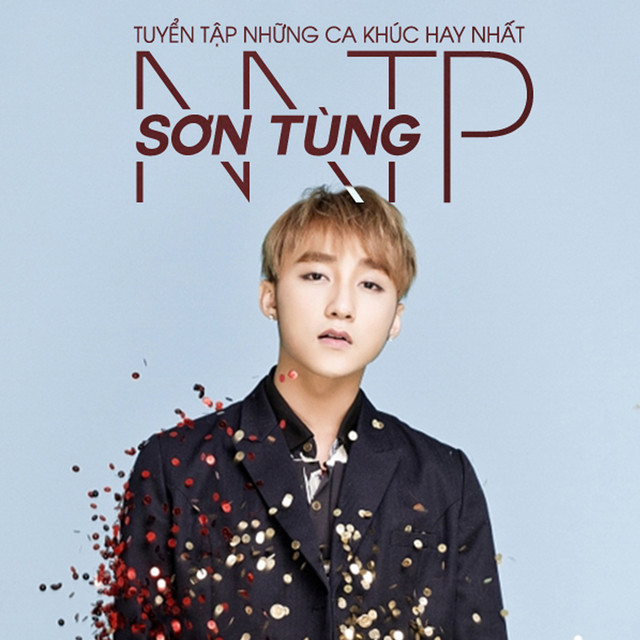

In [12]:
# Download a random online image (RGB) for PCA
# Or you can select your own image (MUST be in RGB format)
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('https://i.scdn.co/image/ab67616d0000b2736e6385f2c42c74af67f3e08c')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)

In [13]:
cv2.imwrite('original_image.png', img)

True

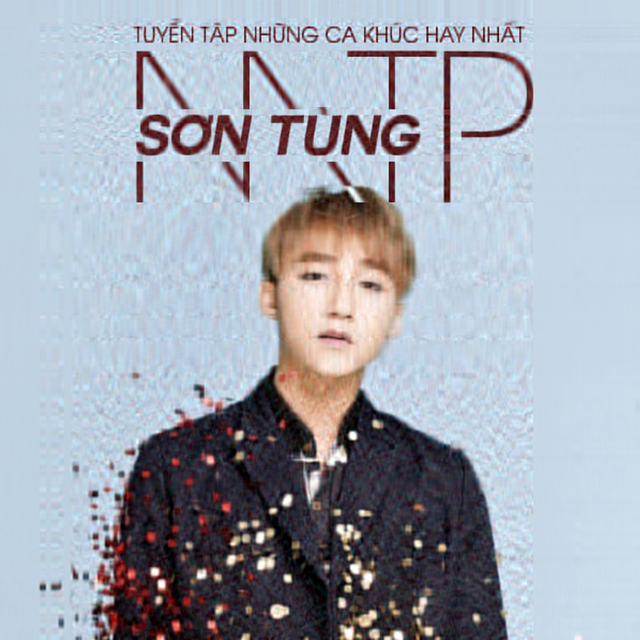

In [14]:
# Compress the image with K = 50
# You can test with other value of K. It is your choice :D
num_component = 50

# Split image channel
blue, green, red = cv2.split(img)

# TODO: Perform image compression using functions given in Assignment 1
U_k_blue, X_mean_blue, blue_compress  = PCA(blue, num_component)
U_k_red, X_mean_red, red_compress   = PCA(red, num_component)
U_k_green, X_mean_green, green_compress = PCA(green, num_component)

blue_reconstruct = decode_PCA(U_k_blue, X_mean_blue, blue_compress)
red_reconstruct = decode_PCA(U_k_red, X_mean_red, red_compress)
green_reconstruct = decode_PCA(U_k_green, X_mean_green, green_compress)

img_compressed = np.dstack((blue_reconstruct, green_reconstruct, red_reconstruct))
cv2_imshow(img_compressed)

In [15]:
cv2.imwrite('compressed_image_50.png', img_compressed)

True

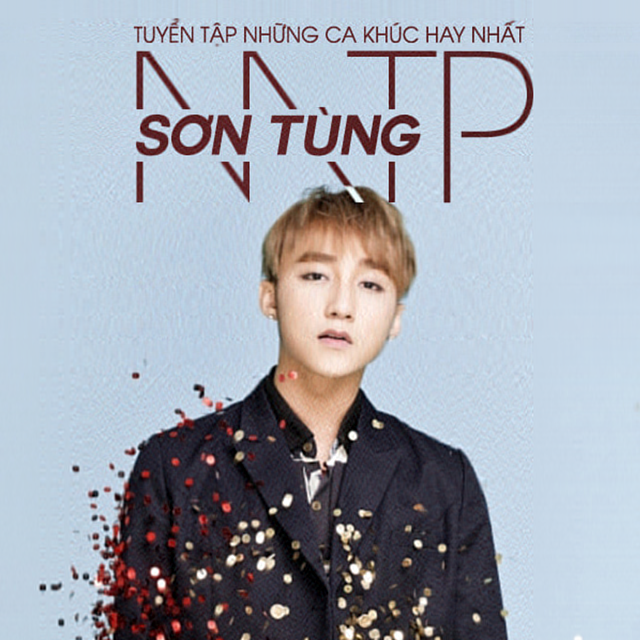

In [16]:
# Compress the image with K = 100
# You can test with other value of K. It is your choice :D
num_component = 100

# Split image channel
blue, green, red = cv2.split(img)

# TODO: Perform image compression using functions given in Assignment 1
U_k_blue, X_avg_blue, blue_compress  = PCA(blue, num_component)
U_k_red, X_avg_red, red_compress   = PCA(red, num_component)
U_k_green, X_avg_green, green_compress = PCA(green, num_component)

blue_reconstruct = decode_PCA(U_k_blue, X_avg_blue, blue_compress)
red_reconstruct = decode_PCA(U_k_red, X_avg_red, red_compress)
green_reconstruct = decode_PCA(U_k_green, X_avg_green, green_compress)

img_compressed = np.dstack((blue_reconstruct, green_reconstruct, red_reconstruct))
cv2_imshow(img_compressed)

In [17]:
cv2.imwrite('compressed_image_100.png', img_compressed)

True

##Assignment 3: PCA for sound compression##


In [18]:
# Download a random online WAV sound file
# Save the file with name "test.wav"
!wget -O test.wav https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav

--2021-10-13 15:49:25--  https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav
Resolving file-examples-com.github.io (file-examples-com.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to file-examples-com.github.io (file-examples-com.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073218 (1.0M) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>]   1.02M  --.-KB/s    in 0.04s   

2021-10-13 15:49:25 (27.5 MB/s) - ‘test.wav’ saved [1073218/1073218]



In [19]:
import numpy as np
from scipy.io.wavfile import read,write
from IPython.display import Audio
# Read the WAV file
rate, WAV = read("test.wav")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


In [20]:
WAV, rate

(array([[ -114,    23],
        [ -241,     3],
        [ -285,   -29],
        ...,
        [ -772, -1059],
        [ -422,  -840],
        [ -787,  -314]], dtype=int16), 8000)

In [21]:
WAV.shape

(268237, 2)

In [27]:
# TODO: Perform sound compression using functions given in Assignment 1
num_component = 1
U_k, X_mean, WAV_compress  = PCA(WAV, num_component)
WAV_compress = decode_PCA(U_k, X_mean, WAV_compress).astype(np.int16)

# TODO: Save the compressed sound file with name "result.wav"
# Hint: Using scipy library
write("result.wav", rate, WAV_compress)

##To do:##
Please write down your comments on PCA for image and sound compression

### **Your answer goes here:** Khi chúng ta áp dụng PCA lên dữ liệu thì số chiều của dữ liệu sẽ giảm xuống tuy nhiên dữ liệu vẫn giữ được thông tin không bị mất mát quá nhiều, điều này cực kỳ có ích cho việc huấn luyện mô hình khi gặp bộ dữ liệu quá phức tạp. Khi chúng ta áp dụng PCA lên tấm ảnh thì nhận thấy rằng nếu chúng ta chọn số K quá thấp thì tấm ảnh sẽ bị mờ dần, do đó nên lựa chọn số K hợp lý để tấm ảnh không bị mất đi nhiều thông tin. Còn khi chúng ta áp dụng PCA lên file âm thanh thì nhận thấy âm thanh bị nén có một chút khác biệt so với âm thanh gốc, nếu cảm nhận kĩ thì có thể nhận thấy rằng âm trường và âm hình của âm thanh nén đã bị giảm đi so với âm thanh gốc.

#Submission note:#

*   You must keep the cells' output.
*   You must submit the original image/sound and the compressed image/sound file in the attachment.

